## PROJETO CAFETERIA
![Texto alternativo](https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExOWFieXU3c21iamhrN3dxNnQ0ZmtoNnhqOHN4MnFudXNnbGZ2bmgzdSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/BqRp4ALpcDpDGbSpgp/giphy.gif)

<!-- Blank -->
---

#### Entendimento do Negócio

A empresa é uma loja de café com vendas diárias de produtos. O objetivo é entender o comportamento dos clientes, identificar padrões e gerar insights acionáveis para melhorar a gestão da loja. 

#### Problema da empresa (Perguntas a serem respondidas com os dados)

**Falta de visibilidade clara sobre:**

➤  Quais produtos com maior impacto no faturamento?<br/>
➤  Por que certos produtos têm baixa venda?<br/>
➤  Classificar os produtos de baixa, média e alta venda.<br/>
➤ Quais dias da semana tiveram mais vendas?<br/>
➤ O dia que menos vende na semana <br/>
➤ Quanto cada cliente gasta em média.



**Descrição da da base:** <br/>
Um conjunto de dados simulado com transações de vendas em cafés, contendo informações sobre itens vendidos, quantidades, preços, métodos de pagamento, localização e datas.

**Colunas da base de dados:**
| Colunas       | Descrição |
| ------------- | ------------- |
| Quantidade  | A quantidade do item comprado. |
| Preço por unidade  | O preço de uma única unidade do item. |
| Total gasto  | O valor total gasto na transação. |
| Método de pagamento  | O método de pagamento utilizado. |
| Localização  | O local onde a transação ocorreu. |
| Data da transação  | A data da transação. |




##### 1. Coleta de Dados


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# importando dados que foram disponibilizados no github

dadosloja_df = pd.read_csv('https://raw.githubusercontent.com/V1L3La/analise-dados-python/refs/heads/main/dirty_cafe_sales.csv')
dadosloja_df

##### 2. Análise Exploratória dos Dados (EDA) - Inicial
        **[DESCOBERTAS INICIAIS ANTES DO TRATAMENTO]**

##### Investigando dados extraidos

In [0]:
# visualisando amostras das linhas do dataframe
dadosloja_df.sample(15)




In [0]:
# Identificando as colunas do dataframe
dadosloja_df.columns

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')

In [0]:
# Inentificando dados nulos e tipos das colunas
dadosloja_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [0]:
# analisando Número total de valores, valores únicos, Valor mais comume Frequência do valor mais comum 
dadosloja_df.describe()
dadosloja_df.describe(percentiles=[0.1, 0.9]) #- Apenas colunas numéricas
dadosloja_df.describe(include='object') #- Apenas colunas categóricas


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


##### 3- Análise de Qualidade dos Dados<br/>

-Contagem valores únicos<br/>
-Identificar valores únicos, duplicados e nulos



In [0]:
# identificar valores únicos de várias colunas separadamente
colunas = ['Payment Method', 'Location', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent', 'Transaction Date']
for coluna in colunas:
    print(f"\n=== Valores únicos na coluna '{coluna}' ===")
    print(dadosloja_df[coluna].unique())


=== Valores únicos na coluna 'Payment Method' ===
['Credit Card' 'Cash' 'UNKNOWN' 'Digital Wallet' 'ERROR' nan]

=== Valores únicos na coluna 'Location' ===
['Takeaway' 'In-store' 'UNKNOWN' nan 'ERROR']

=== Valores únicos na coluna 'Item' ===
['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'UNKNOWN' 'Sandwich' nan
 'ERROR' 'Juice' 'Tea']

=== Valores únicos na coluna 'Quantity' ===
['2' '4' '5' '3' '1' 'ERROR' 'UNKNOWN' nan]

=== Valores únicos na coluna 'Price Per Unit' ===
['2.0' '3.0' '1.0' '5.0' '4.0' '1.5' nan 'ERROR' 'UNKNOWN']

=== Valores únicos na coluna 'Total Spent' ===
['4.0' '12.0' 'ERROR' '10.0' '20.0' '9.0' '16.0' '15.0' '25.0' '8.0' '5.0'
 '3.0' '6.0' nan 'UNKNOWN' '2.0' '1.0' '7.5' '4.5' '1.5']

=== Valores únicos na coluna 'Transaction Date' ===
['2023-09-08' '2023-05-16' '2023-07-19' '2023-04-27' '2023-06-11'
 '2023-03-31' '2023-10-06' '2023-10-28' '2023-07-28' '2023-12-31'
 '2023-11-07' 'ERROR' '2023-05-03' '2023-06-01' '2023-03-21' '2023-11-15'
 '2023-06-10' '2023-0

In [0]:
dadosloja_df.duplicated().sum() # Total de linhas duplicadas

0

In [0]:
#Contagem de valores nulos por cada coluna 
print(dadosloja_df.isnull().sum())            # Contagem de valores nulos por cada coluna     
print(dadosloja_df.isna().mean())             # Porcentagem de valores ausentes
print(dadosloja_df.isnull().sum().sum())      # Total de valores nulos

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64
Transaction ID      0.0000
Item                0.0333
Quantity            0.0138
Price Per Unit      0.0179
Total Spent         0.0173
Payment Method      0.2579
Location            0.3265
Transaction Date    0.0159
dtype: float64
6826


In [0]:
display(dadosloja_df)      # Analisando cada coluna e suas quantiddes

##### **4. Preparação dos Dados e Limpeza**  
-Tratamentos dos dados<br/>



In [0]:
# visualizando os tipos de dados das colunas
dadosloja_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [0]:
# =====================================================================
# CONVERSÃO DE TIPOS DE DADOS
# =====================================================================
print("🔄 Convertendo tipos de dados...")

# Quantity deve ser inteiro (int)
dadosloja_df['Quantity'] = pd.to_numeric(dadosloja_df['Quantity'], errors='coerce').astype('Int64')

# Price Per Unit e Total Spent devem ser float
dadosloja_df['Price Per Unit'] = pd.to_numeric(dadosloja_df['Price Per Unit'], errors='coerce').astype('float64')
dadosloja_df['Total Spent'] = pd.to_numeric(dadosloja_df['Total Spent'], errors='coerce').astype('float64')

# 2. Converter coluna de data para datetime
dadosloja_df['Transaction Date'] = pd.to_datetime(dadosloja_df['Transaction Date'], errors='coerce')

# =====================================================================
# VERIFICAÇÕES FINAIS
# =====================================================================

dadosloja_df.info()

# 3. Mostrar amostra dos dados convertidos
#print("\n📊 Amostra dos dados convertidos:")
#dadosloja_df[['Payment Method','Item','Quantity', 'Price Per Unit', 'Total Spent', 'Location','Transaction Date']].sample(5)

🔄 Convertendo tipos de dados...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9667 non-null   object        
 2   Quantity          9521 non-null   Int64         
 3   Price Per Unit    9467 non-null   float64       
 4   Total Spent       9498 non-null   float64       
 5   Payment Method    7421 non-null   object        
 6   Location          6735 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: Int64(1), datetime64[ns](1), float64(2), object(4)
memory usage: 634.9+ KB


##### Tratamento dos dados errados(Categóricos, numéricos e data) e NAN 

In [0]:
# °°°°°°°°°°°°°°°°°°°°CODE ERRADOS(Categóricos, numéricos e data) e NAN :
# =====================================================================
# TRATAMENTO DE VALORES ERRADOS
# =====================================================================
# 1. EM COLUNAS CATEGÓRICAS:
print("🔄 Tratando colunas categóricas...")
colunas_categoricas = ['Payment Method', 'Location', 'Item']
for coluna in colunas_categoricas:
    # Substituir valores específicos por "Não informado"
    dadosloja_df[coluna] = dadosloja_df[coluna].replace(['ERROR', 'UNKNOWN'], 'Não informado')
    # Preencher valores NaN por "Não informado"
    dadosloja_df[coluna] = dadosloja_df[coluna].fillna('Não informado')
    print(f"✅ Coluna '{coluna}' tratada")

# 2.  EM COLUNAS NUMÉRICAS:   (nesse caso foi decidido substituir por 0)
print("\n🔄 Tratando colunas numéricas...")
colunas_numericas = ['Quantity', 'Price Per Unit', 'Total Spent']
for coluna in colunas_numericas:
    # Substituir valores específicos por 0
    dadosloja_df[coluna] = dadosloja_df[coluna].replace(['ERROR', 'UNKNOWN'], 0)
    # Preencher valores NaN por 0
    dadosloja_df[coluna] = dadosloja_df[coluna].fillna(0)
    print(f"✅ Coluna '{coluna}' tratada")

# 3.  EM COLUNAS DE DATAS:   (nesse caso foi decidido substituir pela primeira data)
print("\n🔄 Tratando coluna de data...")
coluna_data = ['Transaction Date']
for coluna in coluna_data:
    # Substituir valores específicos por "Não informado"
    dadosloja_df[coluna] = dadosloja_df[coluna].replace(['ERROR', 'UNKNOWN'], '2023-01-01')
    # Preencher valores NaN por "Não informado"
    dadosloja_df[coluna] = dadosloja_df[coluna].fillna('2023-01-01')
    print(f"✅ Coluna '{coluna}' tratada")
# =====================================================================
# VERIFICAÇÕES FINAIS
# =====================================================================
# 4. Informações gerais sobre o DataFrame
print("\n📋 Informações gerais do DataFrame:")
dadosloja_df.info()

# 5. Verificar valores nulos restantes
print("\n🔍 Valores nulos após tratamento:")
print(dadosloja_df.isnull().sum())

# 6. Identificar valores únicos de várias colunas separadamente
todas_colunas = ['Payment Method', 'Location', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent', 'Transaction Date']
for cada_coluna in todas_colunas:
    print(f"\n=== Valores únicos na coluna '{cada_coluna}' ===")
    print(dadosloja_df[cada_coluna].unique())
# °°°°°°°°°°°°°°°°°°°°FIM CODE ERRADOS(Categóricos, numéricos e data) e NAN  

##### Desmenbrando a coluna data em dia, mes, ano, Dia da semana

In [0]:
# Criando uma cópia do DataFrame original
dadosloja_df2 = dadosloja_df.copy()

In [0]:
# Criando novas colunas a partir da coluna 'Transaction Date'
dadosloja_df2['dia'] = dadosloja_df2['Transaction Date'].dt.day
dadosloja_df2['Nome do mes'] = dadosloja_df2['Transaction Date'].dt.strftime('%B')
dadosloja_df2['ano'] = dadosloja_df2['Transaction Date'].dt.year
dadosloja_df2['Dia da semana'] = dadosloja_df2['Transaction Date'].dt.strftime('%A')

# Exibindo o DataFrame atualizado
display(dadosloja_df2)

##### Tratando as colunas numéricas Quantity, Price Per Unit e Total Spent
tratar dados.txt

In [0]:
# Visualizando o DataFrame
display(dadosloja_df2)

In [0]:
# TRATANDO AS COLUNAS 

# Criando a nova coluna "Total Spent_nova"
dadosloja_df2["Total Spent_nova"] = dadosloja_df2["Quantity"] * dadosloja_df2["Price Per Unit"]

# Apagando a coluna antiga "Total Spent"
dadosloja_df2 = dadosloja_df2.drop(columns=["Total Spent"])

# Exibindo o novo DataFrame com a nova coluna
display(dadosloja_df2)


In [0]:
# ORGANIZANDO A COLUNA 'Total Spent_nova'

# Pega todas as colunas
cols = list(dadosloja_df2.columns)

# Remove a coluna que será movimentada
cols.remove("Total Spent_nova")

# Insere a coluna onde quiser (ex: depois de Price Per Unit)
pos = cols.index("Price Per Unit") + 1
cols.insert(pos, "Total Spent_nova")

# Reorganiza o DataFrame
dadosloja_df2 = dadosloja_df2[cols]

# Renomeando a coluna "Total Spent_nova" para "Total Spent"
dadosloja_df2 = dadosloja_df2.rename(columns={"Total Spent_nova": "Total Spent"})

# Mostrar o DataFrame
display(dadosloja_df2)


##### Criando uma coluna para identificar vendas que não tem informações registradas

In [0]:
# iDENTIFICANDO FALHAS DE REGISTROS NAS VENDAS

# Criando a nova coluna "Com_não_informado" com base nas condições especificadas
dadosloja_df2["Com_não_informado"] = dadosloja_df2.apply(
    lambda row: "Sim" if (
        row["Item"] == "Não informado" or
        row["Payment Method"] == "Não informado" or
        row["Location"] == "Não informado"
    ) else "Não", axis=1
)

# Apagando a coluna "Falha registro Venda"
#dadosloja_df2 = dadosloja_df2.drop(columns=["Falha registro Venda"])

# Exibindo o DataFrame atualizado
display(dadosloja_df2)

##### Confirmando se os tratamentos dos dados no dataframe foram realizados

In [0]:
display(dadosloja_df2)

##### Tratando outliers

In [0]:
# Identificando valores OUTLIERS

import matplotlib.pyplot as plt
import seaborn as sns

# Calcular IQR
Q1 = dadosloja_df2['Total Spent'].quantile(0.25)
Q3 = dadosloja_df2['Total Spent'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = dadosloja_df2[(dadosloja_df2['Total Spent'] < limite_inferior) | 
                        (dadosloja_df2['Total Spent'] > limite_superior)]

# Plotar histograma
plt.figure(figsize=(10, 5))
sns.histplot(dadosloja_df2['Total Spent'], bins=30)
plt.axvline(limite_inferior, color='r', linestyle='--', label='Limite Inferior')
plt.axvline(limite_superior, color='r', linestyle='--', label='Limite Superior')
plt.title('Histograma de Total Spent com Limites de Outliers')
plt.xlabel('Total Spent')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# Exibir número de outliers
print(f"Número de outliers: {outliers.shape[0]}")

In [0]:
# Criando uma cópia do DataFrame tratado anteriormente

dadosloja_df3 = dadosloja_df2.copy()
display(dadosloja_df3)

##### Investigando o comportamento dos dados numéricos e categóricos para descobrir Insights

In [0]:
# ANALISANDO OS DADOS PARA DESCOBRIR O QUE ESTÁ ACONTECENDO E COMO MELHORAR 

print(dadosloja_df3.describe(percentiles=[0.1, 0.9]))          #- Apenas colunas numericas 

       Quantity  Price Per Unit  Total Spent           dia      ano
count   10000.0    10000.000000      10000.0  10000.000000  10000.0
mean     2.8834        2.792750      8.04785     15.060700   2023.0
std    1.528214        1.409422     6.285673      9.097136      0.0
min         0.0        0.000000          0.0      1.000000   2023.0
10%         1.0        1.000000          1.0      2.000000   2023.0
50%         3.0        3.000000          6.0     15.000000   2023.0
90%         5.0        5.000000         16.0     28.000000   2023.0
max         5.0        5.000000         25.0     31.000000   2023.0


Definindo NAN(Ausência de dados) em colunas numericas para realizar calculos estatisticos investigativos para as descobertas

In [0]:
# Transformar zeros em NaN (ausência de dado)
cols_to_replace = ['Quantity', 'Price Per Unit', 'Total Spent']
dadosloja_df3[cols_to_replace] = dadosloja_df3[cols_to_replace].replace(0, np.nan)

# Criar coluna "Com_Registro_nulo"
dadosloja_df3["Com_Registro_nulo"] = dadosloja_df3[cols_to_replace].isnull().any(axis=1).map({True: "Sim", False: "Não"})

display(dadosloja_df3)

In [0]:
# CHECANDO SE TODOS OS TRATAMENTOS FORAM FEITOS

# Exibir os valores únicos de cada coluna
for col in dadosloja_df3.columns:
    print(f"Valores únicos na coluna '{col}':")
    print(dadosloja_df3[col].unique())
    print("\n")

Valores únicos na coluna 'Transaction ID':
['TXN_1961373' 'TXN_4977031' 'TXN_4271903' ... 'TXN_5255387' 'TXN_7695629'
 'TXN_6170729']


Valores únicos na coluna 'Item':
['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'Não informado' 'Sandwich'
 'Juice' 'Tea']


Valores únicos na coluna 'Quantity':
<IntegerArray>
[2, 4, 5, 3, 1, <NA>]
Length: 6, dtype: Int64


Valores únicos na coluna 'Price Per Unit':
[2.  3.  1.  5.  4.  1.5 nan]


Valores únicos na coluna 'Total Spent':
<FloatingArray>
[ 4.0, 12.0, 10.0, 20.0,  9.0, 16.0, 15.0, 25.0,  8.0,  5.0,  3.0,  6.0, <NA>,
  2.0,  1.0,  7.5,  1.5,  4.5]
Length: 18, dtype: Float64


Valores únicos na coluna 'Payment Method':
['Credit Card' 'Cash' 'Não informado' 'Digital Wallet']


Valores únicos na coluna 'Location':
['Takeaway' 'In-store' 'Não informado']


Valores únicos na coluna 'Transaction Date':
['2023-09-08T00:00:00.000000000' '2023-05-16T00:00:00.000000000'
 '2023-07-19T00:00:00.000000000' '2023-04-27T00:00:00.000000000'
 '2023-06-11T00:

%md
#### 5. Modelagem de Dados (fatos, dimensões, relacionamentos)


In [0]:
print(dadosloja_df3.columns)

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date', 'dia', 'Nome do mes',
       'ano', 'Dia da semana', 'Com_não_informado', 'Com_Registro_nulo'],
      dtype='object')


In [0]:
import pandas as pd

# CRIANDO DIMENSÕES E FATO VENDAS

# ===============================
# 🔹 DIMENSÕES
# ===============================

# Dimensão Item
dim_item = dadosloja_df3[['Item']].drop_duplicates().reset_index(drop=True)
dim_item['ItemID'] = dim_item.index + 1

# Dimensão Pagamento
dim_pagamento = dadosloja_df3[['Payment Method']].drop_duplicates().reset_index(drop=True)
dim_pagamento['PagamentoID'] = dim_pagamento.index + 1

# Dimensão Local
dim_local = dadosloja_df3[['Location']].drop_duplicates().reset_index(drop=True)
dim_local['LocalID'] = dim_local.index + 1

# Dimensão Tempo
dim_tempo = dadosloja_df3[['Transaction Date', 'dia', 'Nome do mes', 'ano', 'Dia da semana']] \
    .drop_duplicates().reset_index(drop=True)
dim_tempo['TempoID'] = dim_tempo.index + 1

# Dimensão Qualidade (opcional)
dim_qualidade = dadosloja_df3[['Com_não_informado', 'Com_Registro_nulo']].drop_duplicates().reset_index(drop=True)
dim_qualidade['QualidadeID'] = dim_qualidade.index + 1

# ===============================
# 🔹 FATO VENDAS
# ===============================
# Fazendo merge para substituir os textos por IDs das dimensões

fato_vendas = dadosloja_df3.merge(dim_item, on='Item', how='left') \
    .merge(dim_pagamento, on='Payment Method', how='left') \
    .merge(dim_local, on='Location', how='left') \
    .merge(dim_tempo, on=['Transaction Date','dia','Nome do mes','ano','Dia da semana'], how='left') \
    .merge(dim_qualidade, on=['Com_não_informado','Com_Registro_nulo'], how='left')

# Mantendo apenas colunas da fato
fato_vendas = fato_vendas[[
    'Transaction ID', 'Quantity', 'Price Per Unit', 'Total Spent',
    'ItemID', 'PagamentoID', 'LocalID', 'TempoID', 'QualidadeID'
]]

# ===============================
# 🔹 Exibir resultado
# ===============================
print("Dimensão Item:")
print(dim_item.head())

print("\nDimensão Pagamento:")
print(dim_pagamento.head())

print("\nDimensão Local:")
print(dim_local.head())

print("\nDimensão Tempo:")
print(dim_tempo.head())

print("\nDimensão Qualidade:")
print(dim_qualidade.head())

print("\nFato Vendas:")
print(fato_vendas.head())


Dimensão Item:
       Item  ItemID
0    Coffee       1
1      Cake       2
2    Cookie       3
3     Salad       4
4  Smoothie       5

Dimensão Pagamento:
   Payment Method  PagamentoID
0     Credit Card            1
1            Cash            2
2   Não informado            3
3  Digital Wallet            4

Dimensão Local:
        Location  LocalID
0       Takeaway        1
1       In-store        2
2  Não informado        3

Dimensão Tempo:
  Transaction Date  dia Nome do mes   ano Dia da semana  TempoID
0       2023-09-08    8   September  2023        Friday        1
1       2023-05-16   16         May  2023       Tuesday        2
2       2023-07-19   19        July  2023     Wednesday        3
3       2023-04-27   27       April  2023      Thursday        4
4       2023-06-11   11        June  2023        Sunday        5

Dimensão Qualidade:
  Com_não_informado Com_Registro_nulo  QualidadeID
0               Não               Não            1
1               Sim               Não 

In [0]:
# Confirmando se houve perda de dados (ou erros nos merges)

print(f"Linhas antes: {len(dadosloja_df3)}")
print(f"Linhas depois: {len(fato_vendas)}")

Linhas antes: 10000
Linhas depois: 10000


#### 6- Insights (revelação dos dados disponibilizados) & Propostas de Solução

In [0]:
# Criando uma cópia do DataFrame tratado anteriormente

dadosloja_df4 = dadosloja_df3.copy()
display(dadosloja_df4)

In [0]:
#  Criando coluna Classificação_vendas

# Criar a coluna "Classificação_vendas" com base nas condições especificadas
dadosloja_df4["Classificação_vendas"] = dadosloja_df4["Total Spent"].apply(
    lambda x: "Venda_C_Erro" if pd.isnull(x) else
              "Venda Baixa" if 1 <= x <= 10 else
              "Venda Média" if 10 < x <= 20 else
              "Venda Alta" if x > 20 else None
)

# Exibir o DataFrame atualizado
display(dadosloja_df4)

#### 2-Respostas as perguntas da empresa
➤ **[1]** Quais produtos com maior impacto no faturamento.?

➤ **[2]** Por que certos produtos têm baixa venda?<br/>
-Coffee  >>   11.50% de registros não Informados  
-Tea  >>  10.16% de registros não Informados  
-Cookie  >>  9.64% de registros não Informados 

➤ **[3]** classificar os produtos de baixo, médio e alto venda.

➤ **[4]** quais dias da semana tiveram mais vendas.

➤ **[5]** qual dia que menos vende no Mês?

➤ **[7]** Qual localização tem maior potencial de crescimento?

➤ **[8]** Aumentar a receita média por itens 

➤ **[9]** Melhorar a performance de produtos com baixa rotação.


In [0]:
# 1- produtos com maior impacto no faturamento menos o item Não informado

# Filtrar os dados para incluir apenas 'Item' diferente de 'Não informado'
dados_filtrados = dadosloja_df4[dadosloja_df4['Item'] != 'Não informado']

# Agrupar os dados por 'Item' e somar o 'Total Spent' para cada produto
faturamento_por_produto = dados_filtrados.groupby('Item')['Total Spent'].sum().reset_index()

# Ordenar os produtos pelo 'Total Spent' em ordem decrescente
faturamento_por_produto = faturamento_por_produto.sort_values(by='Total Spent', ascending=False)

# Criar gráfico de barras lateral com números totais em cada barra
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x='Total Spent', y='Item', data=faturamento_por_produto, orient='h')
plt.title('Produtos com Maior Impacto no Faturamento (Excluindo "Não informado")')
plt.xlabel('Total Spent')
plt.ylabel('Item')

# Adicionar números totais em cada barra
for index, value in enumerate(faturamento_por_produto['Total Spent']):
    barplot.text(value, index, f'{value:.2f}', va='center')

plt.show()



*[2]** _Por que certos produtos têm baixa venda?
Coffee(Quant=2), Tea e Cookie

In [0]:
display(dadosloja_df4)


In [0]:
# Filtrar os dados para incluir apenas 'Item' igual a 'Cookie' e 'Com_não_informado' igual a 'Sim'
Cookie_nao_informado = dadosloja_df4[(dadosloja_df4['Item'] == 'Cookie') & (dadosloja_df4['Com_não_informado'] == 'Sim')]

# Calcular a porcentagem de 'Cookie' com 'Com_não_informado' igual a 'Sim'
percent_Cookie_nao_informado = (Cookie_nao_informado.shape[0] / dadosloja_df4[dadosloja_df4['Com_não_informado'] == 'Sim'].shape[0]) * 100

# Exibir a porcentagem
print(f"Porcentagem de 'Cookie' com 'Com_não_informado' = 'Sim': {percent_Cookie_nao_informado:.2f}%")

# Criar gráfico de pizza
labels = ['Cookie com Não Informado', 'Outros com Não Informado']
sizes = [percent_Cookie_nao_informado, 100 - percent_Cookie_nao_informado]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # Explode a fatia 'Cookie com Não Informado'

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Porcentagem de Cookie com "Com_não_informado" = "Sim"')
plt.show()

In [0]:
# Filtrar os dados para 'Item' = 'Tea' e 'Com_não_informado' = 'Sim'
tea_nao_informado = dadosloja_df4[(dadosloja_df4['Item'] == 'Tea') & (dadosloja_df4['Com_não_informado'] == 'Sim')]

# Calcular a porcentagem
percent_tea_nao_informado = (tea_nao_informado.shape[0] / dadosloja_df4[dadosloja_df4['Com_não_informado'] == 'Sim'].shape[0]) * 100

# Exibir a porcentagem
print(f"Porcentagem de 'Tea' com 'Com_não_informado' = 'Sim': {percent_tea_nao_informado:.2f}%")

# Criar gráfico de pizza
import matplotlib.pyplot as plt

# Dados para o gráfico de pizza
labels = ['Tea com Com_não_informado = Sim', 'Outros']
sizes = [percent_tea_nao_informado, 100 - percent_tea_nao_informado]

# Plotar gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Porcentagem de Tea com Com_não_informado = Sim')
plt.show()

In [0]:
# Filtrar os dados para incluir apenas 'Com_não_informado' = 'Sim'
dados_filtrados = dadosloja_df4[dadosloja_df4['Com_não_informado'] == 'Sim']

# Calcular a porcentagem de 'Item' = 'Coffee' em relação ao total de 'Com_não_informado' = 'Sim'
percent_Coffee = (dados_filtrados[dados_filtrados['Item'] == 'Coffee'].shape[0] / dados_filtrados.shape[0]) * 100

# Exibir a porcentagem
print(f"Porcentagem de 'Item' = 'Coffee' com 'Com_não_informado' = 'Sim': {percent_Coffee:.2f}%")

# Criar gráfico de pizza
labels = ['Coffee', 'Outros']
sizes = [percent_Coffee, 100 - percent_Coffee]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # Explode a fatia 'Coffee'

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Porcentagem de Item Coffee com Com_não_informado = Sim')
plt.show()

In [0]:
display(dadosloja_df4)

In [0]:
# qual dia(coluna dia) que menos venda no Mês? crie um gráfico Scatter

# Agrupar os dados por 'Dia' e somar o 'Total Spent'
vendas_por_dia = dadosloja_df4.groupby('dia')['Total Spent'].sum().reset_index()

# Encontrar o dia com menor venda
dia_menor_venda = vendas_por_dia.loc[vendas_por_dia['Total Spent'].idxmin()]

# Criar gráfico de dispersão (Scatter)
plt.figure(figsize=(10, 5))
sns.scatterplot(x='dia', y='Total Spent', data=vendas_por_dia)
plt.axvline(dia_menor_venda['dia'], color='r', linestyle='--', label=f'Menor Venda: Dia {dia_menor_venda["dia"]}')
plt.title('Vendas por Dia do Mês')
plt.xlabel('Dia do Mês')
plt.ylabel('Total Spent')
plt.legend()
plt.show()

# Exibir o dia com menor venda
print(f"Dia com menor venda: {dia_menor_venda['dia']} com Total Spent de {dia_menor_venda['Total Spent']:.2f}")

In [0]:
# Investigando Outlier de vends no dia 1

dadosloja_df4['Total Spent'].describe(percentiles=[0.1, 0.9])

count      9006.0
mean     8.936098
std      5.994375
min           1.0
10%           3.0
50%           8.0
90%          20.0
max          25.0
Name: Total Spent, dtype: Float64

💡 **Descoberta sobre a possibilidade de Outliers das vendas somente no dia 1**<br/>

Média > Mediana - Há clientes que gastam muito mais<br/> 
Q1 = 3.0 - Muitos clientes gastam pouco <br/>
Q3 = 20.0 - 75% dos clientes gastam até R$ 20<br/>
Max = 25.0 - **Valores altos existem, mas não são extremos → não são outliers**

✅ **Conclusão**<br/>
Essas estatísticas mostram que:<br/>
O cliente típico gasta cerca de R$ 8,94 por transação.<br/>
**Há uma grande variedade de gastos — desde R$ 1 até R$ 25.**<br/>
A distribuição é assimétrica, com alguns clientes gastando muito mais.

In [0]:
# Vendas por Dia da Semana

# Criar uma coluna para o dia da semana
dadosloja_df4['Dia da Semana'] = dadosloja_df4['Transaction Date'].dt.day_name()

# Agrupar os dados por 'Dia da Semana' e somar o 'Total Spent'
vendas_por_dia = dadosloja_df4.groupby('Dia da Semana')['Total Spent'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).reset_index()

# Criar gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x='Dia da Semana', y='Total Spent', data=vendas_por_dia)
plt.title('Vendas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Total Spent')
plt.xticks(rotation=45)
plt.show()

In [0]:
# Produtos com baixa venda

# Agrupar os dados por 'Item' e somar o 'Total Spent' para cada produto
vendas_por_produto = dadosloja_df4.groupby('Item')['Total Spent'].sum().reset_index()

# Ordenar os produtos pelo 'Total Spent' em ordem crescente
vendas_por_produto = vendas_por_produto.sort_values(by='Total Spent', ascending=True)

# Exibir os produtos com baixa venda
display(vendas_por_produto)

Item,Total Spent
Cookie,2898.0
Tea,4431.0
Coffee,6424.0
Não informado,7596.5
Cake,9540.0
Juice,9561.0
Smoothie,12132.0
Sandwich,12296.0
Salad,15600.0


In [0]:
# Calcular a porcentagem de 'Item' = 'Não informado'

percent_nao_informado = (dadosloja_df4[dadosloja_df3['Item'] == 'Não informado'].shape[0] / dadosloja_df4.shape[0]) * 100

# Exibir a porcentagem
print(f"Porcentagem de 'Item' = 'Não informado': {percent_nao_informado:.2f}%")

# Criar gráfico de barras
import matplotlib.pyplot as plt

# Contar a frequência de cada valor na coluna 'Item'
item_counts = dadosloja_df4['Item'].value_counts()

# Plotar gráfico de barras
plt.figure(figsize=(10, 5))
item_counts.plot(kind='bar')
plt.title('Frequência de Itens')
plt.xlabel('Item')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

In [0]:
display(dadosloja_df4)

In [0]:
#  Qual localização tem maior potencial de crescimento?

# Contar a frequência de cada valor na coluna 'Location'
location_counts = dadosloja_df4['Location'].value_counts()

# Criar gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Localizações')
plt.show()

✅ **Conclusão:**<br/> Qual tem maior potencial de crescimento?
❌ Nem In-store nem Takeaway têm maior potencial — porque:
Elas já têm mesmo desempenho.
Não há evidência de que uma seja melhor que a outra.<br/>
✅ **A verdadeira oportunidade está em "Não informado".** 

💡 Insight Estratégico<br/>
**O potencial de crescimento está na redução de "Não informado".** 

Por quê?<br/>
Se identificar onde essas transações estão acontecendo, pode:<br/>
Criar estratégias específicas para cada local.
Melhorar o registro de dados.
Descobrir novos mercados (ex: delivery, eventos).

In [0]:
# Como aumentar a receita média por item .

# Agrupar os dados por 'Item' e calcular a receita média por item
receita_media_por_item = dadosloja_df4.groupby('Item')['Total Spent'].mean().reset_index()

# Ordenar os itens pela receita média em ordem decrescente
receita_media_por_item = receita_media_por_item.sort_values(by='Total Spent', ascending=False)

# Exibir os itens com maior receita média
display(receita_media_por_item)

Item,Total Spent
Salad,15.145631067961165
Smoothie,12.20523138832998
Sandwich,12.031311154598827
Cake,9.155470249520153
Juice,8.994355597365946
Não informado,8.843422584400466
Coffee,6.129770992366412
Tea,4.558641975308642
Cookie,2.9692622950819674



📈 **Estratégias para aumentar a receita média por item**

**Aumentar Quantidade Vendida**

Promoções, combos ou cross-sell (ex.: Café + Cookie).

Criar planos de fidelidade para estimular compras repetidas.

**Aumentar Preço Unitário**

Reposicionar itens de baixo preço (como Cookie e Tea) oferecendo versões “premium” (mais recheio, ingredientes diferenciados).

Incluir extras opcionais com valor agregado (coberturas, tamanhos maiores).

**Reduzir o impacto dos itens de baixa receita**

Reavaliar se vale a pena manter itens com baixa margem (como Cookie) ou reposicionar para aumentar sua atratividade.

**Mix de Produtos**

Estimular os itens de maior ticket médio (Salad, Smoothie, Sandwich) através de destaque no cardápio ou marketing.

**Segmentação de Clientes**

Clientes de takeaway tendem a gastar menos → oferecer descontos em combos.

Clientes in-store tendem a gastar mais → oferecer upsell (ex.: sobremesas, bebidas extras).







🔧 **Estratégias para melhorar produtos de baixa rotação**

**1. Promoções direcionadas**

Criar combos com itens de alta rotação (ex.: “Café + Cookie por um preço especial”).

Oferecer descontos progressivos: “leve 3 Cookies, pague 2”.

**2. Reposicionamento do produto**

Ajustar embalagem, porções ou apresentação para dar mais valor percebido.

Criar versões diferenciadas (sabores novos, edições limitadas).

**3. Destaque no ponto de venda**

Reposicionar esses itens no cardápio ou prateleira para maior visibilidade.

Sugerir o produto como acompanhamento natural (ex.: “Cookie como sobremesa do Sandwich”).

**4. Estratégias digitais**

Usar campanhas em redes sociais com foco nesses itens.

Criar gatilhos de escassez: “Edição limitada de Cookies esta semana”.

**5. Ajuste de precificação**

Testar redução de preço para aumentar volume vendido.

Alternativamente, criar uma versão premium com maior margem.

**6. Entender o cliente**

Analisar dados: quem compra pouco Cookie/Tea? Em qual local? Em qual método de pagamento?

Ajustar a estratégia para o público correto (ex.: Tea pode ser promovido para clientes que pedem Salad → público mais saudável).

✅ Em resumo:

Produtos de baixa rotação não precisam ser eliminados → podem ser reposicionados.

O segredo é associar a produtos fortes, dar visibilidade e criar desejo.

Use os dados de vendas para segmentar onde atacar: local, canal de venda, público.

##### 2-Análise profunda dos dados:

In [0]:
print(dadosloja_df4.describe(percentiles=[0.1, 0.9]))          #- Apenas colunas numericas 

       Quantity  Price Per Unit  Total Spent           dia      ano
count    9521.0     9467.000000       9006.0  10000.000000  10000.0
mean   3.028463        2.949984     8.936098     15.060700   2023.0
std    1.419007        1.278450     5.994375      9.097136      0.0
min         1.0        1.000000          1.0      1.000000   2023.0
10%         1.0        1.000000          3.0      2.000000   2023.0
50%         3.0        3.000000          8.0     15.000000   2023.0
90%         5.0        5.000000         20.0     28.000000   2023.0
max         5.0        5.000000         25.0     31.000000   2023.0


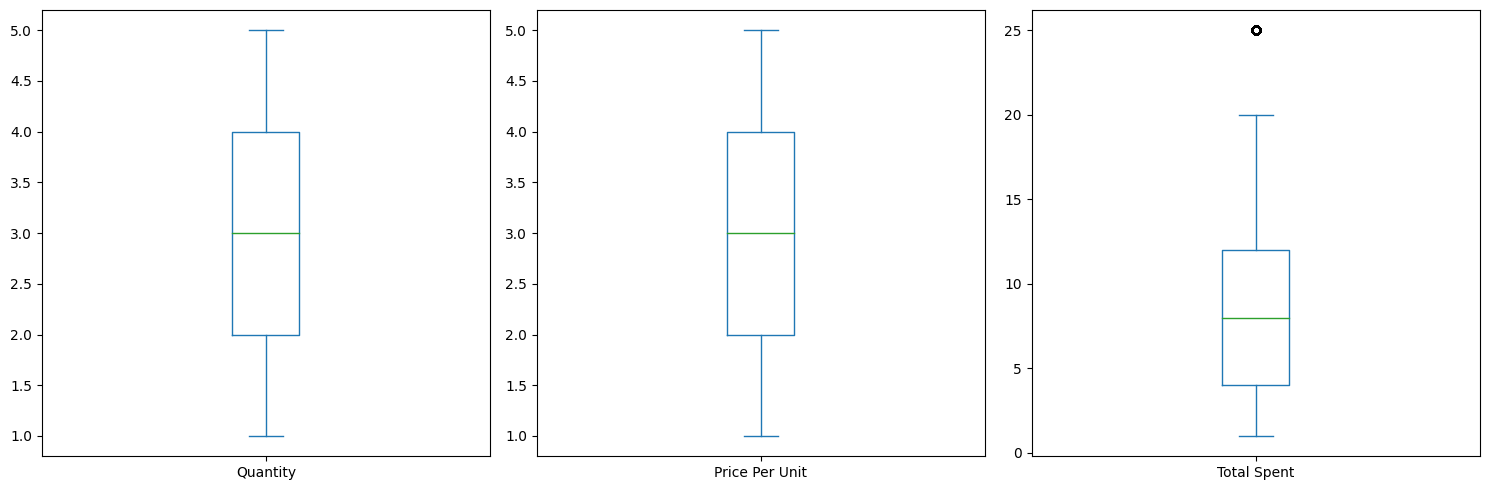

In [0]:
import matplotlib.pyplot as plt

# Criar o boxplot para as colunas especificadas
dadosloja_df4[['Quantity', 'Price Per Unit', 'Total Spent']].plot(kind='box', subplots=True, layout=(1, 3), figsize=(15, 5))

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()

📊 Análise dos Dados (Dados Numéricos)<br/>

1️⃣ **Quantity (Quantidade de itens)**

O que está acontecendo?

Média de 3,02, indicando que os clientes geralmente compram 3 itens por transação.<br/>
O mínimo é 1 e o máximo 5 → não há valores zerados ou fora do padrão.<br/>
50% (mediana) = 3, reforçando que a distribuição é centralizada nesse valor.<br/>
90% = 5 → a maioria das compras não ultrapassa 5 itens.

Insights Práticos:

Clientes tendem a comprar em pequenas quantidades (1 a 5 itens).<br/>
**Estratégias de promoções podem estimular aumento do volume por compra (ex.: leve 4 e pague 3).**

Como melhorar os insights:

**Segmentar clientes por faixas de quantidade comprada (ex.: pequenos compradores vs. compradores recorrentes).**

Verificar se há diferença no ticket médio entre quem compra 1–2 itens e quem compra 4–5 itens.<br/><br/>

2️⃣ **Price Per Unit (Preço por unidade)**

O que está acontecendo?

Média de 2,95, próxima da mediana (3,0), sugerindo uma distribuição equilibrada.<br/>
Preços variam apenas de 1 a 5, mostrando consistência.<br/>
Desvio padrão de 1,28 indica variação moderada nos preços.

Insights Práticos:

A maioria dos produtos está dentro de uma faixa de preço acessível.<br/>
**Preços mais altos (4–5) podem ser analisados em relação ao volume de vendas para avaliar elasticidade.**

Como melhorar os insights:

**Criar faixas de preço (baixo, médio, alto) para entender sensibilidade de compra.<br/>**
**Avaliar se produtos de maior valor têm impacto positivo no ticket médio.**

3️⃣ **Total Spent (Valor total gasto por transação)**

O que está acontecendo?<br/>
Média de 8,93, mediana de 8,0, mostrando consistência.<br/>
O mínimo é 1 e o máximo 25 → não há registros de valor zero.<br/>
**Desvio padrão de 5,99 indica que há variação relevante entre compras pequenas e maiores.**<br/>
90% das transações ficam até 20,0, apenas poucas chegam ao máximo (25).

Insights Práticos:

Grande parte das compras tem baixo valor (até 20).<br/>
Há clientes que gastam significativamente mais, sugerindo um perfil de clientes de alto valor.<br/>

Como melhorar os insights:

**Criar clusters de clientes por ticket médio (baixo, médio e alto valor).**<br/>
**Oferecer programas de fidelização para incentivar compras maiores.**<br/>
**Cruzar esses dados com frequência de compra para identificar clientes recorrentes de alto valor.**

✅ Resumo geral:<br/>
Os dados estão limpos (sem zeros ou valores inválidos). Há consistência entre quantidade, preço e gasto total. Os principais insights vêm da segmentação de clientes por quantidade comprada, faixa de preço dos produtos e ticket médio, o que pode apoiar estratégias de marketing, promoções e fidelização.

In [0]:
# CORRELAÇÃO E VARIÂNCIA NUMÉRICA

# Selecionar as colunas uma vez
colunas = ['Quantity', 'Price Per Unit', 'Total Spent']
dados_sel = dadosloja_df4[colunas]

# Calcular variância e correlação
variancia = dados_sel.var()
correlacao = dados_sel.corr()

# Exibir resultados formatados
print("📊 Variância:\n", variancia, "\n")
print("🔗 Correlação:\n", correlacao)


📊 Variância:
 Quantity           2.013581
Price Per Unit     1.634436
Total Spent       35.932535
dtype: float64 

🔗 Correlação:
                 Quantity  Price Per Unit  Total Spent
Quantity        1.000000        0.006078     0.704784
Price Per Unit  0.006078        1.000000     0.645720
Total Spent     0.704784        0.645720     1.000000


**Variância**<br/>

🔎 1. O que está acontecendo?

Quantity (2.01) → A quantidade de produtos comprados por cliente apresenta uma variação moderada. Ou seja, não é sempre o mesmo número de itens, mas também não é extremamente desigual.

Price Per Unit (1.63) → Os preços unitários variam um pouco, indicando que há produtos mais caros e mais baratos, mas dentro de uma faixa relativamente controlada.

Total Spent (35.93) → O gasto total tem uma variabilidade bem mais alta que as outras variáveis. Isso acontece porque ele resulta da multiplicação de quantidade × preço unitário. Pequenas variações nessas duas variáveis geram uma variação muito maior no gasto total.

💡 2. Insights Práticos

O Total Spent **é o indicador mais instável: alguns clientes gastam pouco e outros gastam muito mais, mostrando perfis diferentes de consumo.**

**A variação moderada em quantidade e preço** sugere que não são extremos oscilando, mas sim um conjunto de compras variadas que, combinadas, aumentam muito a dispersão no gasto.<br/>
**Essa diferença pode indicar oportunidades de segmentação de clientes (ex: clientes de alto ticket médio vs. clientes de baixo ticket médio).**

**A variância relativamente baixa em "Price Per Unit" sugere que a maior parte da dispersão do gasto total vem da quantidade comprada.**

🚀 3. Como melhorar esses insights?

**Verificar outliers no Total Spent** → clientes que gastaram muito acima da média podem estar inflando a variância.

**Criar grupos de clientes com base em gasto total (baixo, médio, alto) e analisar padrões de compra.**

**Relacionar Quantity × Price Per Unit para entender se os maiores gastos vêm de muitos itens baratos ou de poucos itens caros.**

**Comparar variância ao longo do tempo (ex: por mês ou semana) para ver se existe sazonalidade que impacta a dispersão dos gastos.**



**Correlações Numéricas<br/>**

🔎 O que está acontecendo?

**Quantity x Price Per Unit (0.0060)**

Correlação praticamente **nula**, mostrando que o número de unidades compradas não tem relação linear com o preço unitário.<br/>
Ou seja, os clientes não estão comprando mais ou menos em função do preço.

**Quantity x Total Spent (0.7048)**

Correlação forte positiva.<br/>
Quanto maior a quantidade comprada, maior tende a ser o valor gasto total.

**Price Per Unit x Total Spent (0.6457)**

Correlação moderada a forte positiva.<br/>
**Itens com preços unitários maiores puxam o total gasto para cima, mesmo sem depender da quantidade.**

💡 Insights Práticos

**Quantidade impacta bastante no faturamento: ações que incentivam compra em volume (ex.: “leve 3, pague 2”) podem aumentar consideravelmente o total gasto.**

Preço unitário também influencia, mas menos que a quantidade: **aumentar ticket médio pode ser feito por meio de upsell (produtos premium) ou combos que incluam itens mais caros.**

**Quantidade ≠ Preço: já que não há relação entre preço e unidades compradas, há espaço para testar diferentes estratégias de precificação sem necessariamente reduzir volume de vendas.**

🛠 Como melhorar esses Insights

Segmentação de clientes: **verificar quais perfis gastam mais por quantidade e quais gastam mais por preço unitário.<br/>
Analisar produtos individualmente: alguns itens podem ter comportamento diferente (ex.: café barato vs. sobremesa cara).**

Testar elasticidade de preço: **simular aumentos/reduções de preço para entender até que ponto o “Price Per Unit” impacta no “Total Spent”.**

Visualizar dados: **usar scatter plots (dispersão) de Quantity vs Total Spent e Price Per Unit vs Total Spent ajuda a identificar padrões mais claros, além da correlação linear.**

**Incluir variáveis externas: como promoções, localização, método de pagamento, para enriquecer o entendimento do que impulsiona mais o gasto.**

In [0]:


import pandas as pd
# CORRELAÇÃO CATEGÓRICA

# Exemplo: transformar colunas categóricas em dummies
dados_dummies = pd.get_dummies(dadosloja_df4[['Item','Payment Method','Location']], drop_first=True)
# Calcular correlação
corr_categoricas = dados_dummies.corr()
corr_categoricas

**Correlação Categórica**

1. O que está acontecendo?

**Itens (Coffee, Cookie, Juice, etc.):**

**As correlações entre eles são levemente negativas (em torno de -0,11 a -0,13).<br/>
Isso significa que não existe um padrão forte de compra conjunta. Quando alguém compra um, tende a não levar outro ao mesmo tempo (ex.: quem compra café raramente compra suco junto).**<br/>

**Métodos de pagamento:**

Forte correlação negativa entre:<br/>
Cartão de Crédito × Carteira Digital (-0,29)<br/>
Cartão de Crédito × Não informado (-0,37)<br/>
Carteira Digital × Não informado (-0,37)<br/>
Isso mostra que os clientes escolhem um método dominante e dificilmente alternam entre eles.

**Localização:**

Local Não informado × Takeaway tem correlação fortemente negativa (-0,53).<br/>
Ou seja, quando a localização não está informada, dificilmente é takeaway. E quando é takeaway, quase sempre a localização está registrada corretamente.

**Itens vs Pagamento/Localização:**

Correlações próximas de zero → não há ligação clara entre o que é comprado e como ou onde é comprado.

2. Insights Práticos

**Cross-sell pouco explorado<br/>
Como os itens têm correlação negativa, há espaço para incentivar combos (ex.: Café + Cookie).<br/>
Isso pode aumentar o ticket médio sem competir com hábitos já estabelecidos.**

**Segmentação por forma de pagamento**

Os clientes têm preferências claras.

**Pode-se criar promoções específicas: desconto no crédito para fidelização ou cashback na carteira digital.**

Localização como variável de negócio

**O padrão claro de Takeaway vs Não informado mostra que o takeaway pode ser tratado como um segmento próprio, com ofertas diferenciadas (ex.: descontos para retirada rápida).**

3. Como melhorar esses insights?

**Adicionar variáveis de tempo (hora do dia, dia da semana, sazonalidade):<br/>
Talvez o Café seja mais forte de manhã, o Suco à tarde, e isso pode mudar as correlações.**

Ir além da correlação com análises de cestas de compra (Market Basket Analysis):

Isso permite descobrir associações reais (ex.: 30% de quem compra Café leva Cookie junto), muito mais informativo do que correlação simples.

**Reduzir "Não informado" em Pagamento e Localização:<br/>
Preencher melhor esses dados vai mostrar padrões escondidos que hoje ficam diluídos.**

**Testar promoções direcionadas:<br/>
Oferecer pares estratégicos (ex.: “Na compra de um Suco, leve 50% em Cookie”) para ver se as correlações negativas podem virar positivas.**

✅ Resumo final:

**Os itens são comprados de forma independente → chance de trabalhar cross-sell.**

**Pagamentos têm substituição forte → segmentar campanhas por método.**

**Localização “Takeaway” é bem definida → pode ser explorada como categoria de cliente.**



#### Fonte de dados:

**Kaggle:**  https://www.kaggle.com/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training/data                

Licença dos dados utilizados:  https://creativecommons.org/licenses/by-sa/4.0/